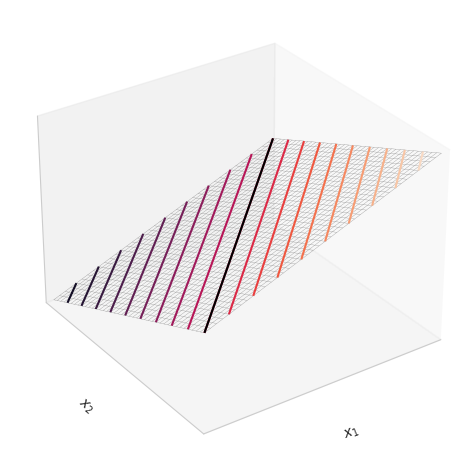

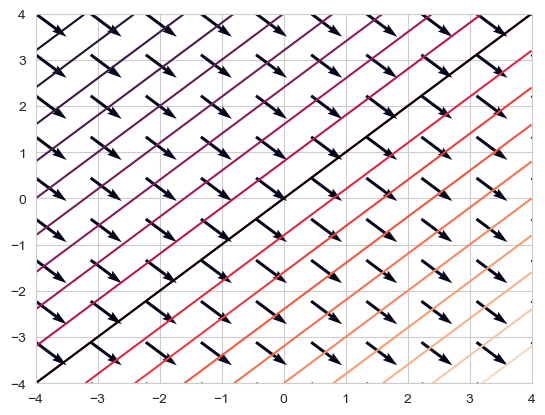

<Figure size 640x480 with 0 Axes>

In [1]:
# Bk4_Ch19_01.py

import sympy
import numpy as np
import matplotlib.pyplot as plt


#define symbolic vars, function
x1,x2 = sympy.symbols('x1 x2')
# f_x = 3*x1**2-5*x2**2
# 定义函数
f_x = x1 - x2

#take the gradient symbolically
# 求导数
grad_f = [sympy.diff(f_x,var) for var in (x1,x2)]

# 转换为可调用函数
f_x_fcn = sympy.lambdify([x1,x2],f_x)
#turn into a bivariate lambda for numpy
grad_fcn = sympy.lambdify([x1,x2],grad_f)


xx1, xx2 = np.meshgrid(np.linspace(-4,4,41),np.linspace(-4,4,41))

# coarse mesh
xx1_, xx2_ = np.meshgrid(np.linspace(-4,4,10),np.linspace(-4,4,10))
V = grad_fcn(xx1_,xx2_)
V_z = np.ones_like(V[1]);

ff_x = f_x_fcn(xx1,xx2)
# ff_x_ = f_x_fcn(xx1_,xx2_)

color_array = np.sqrt(V[0]**2 + V[1]**2)
l_3D_vectors = np.sqrt(V[0]**2 + V[1]**2 + V_z**2)

# 3D 
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color = [0.5,0.5,0.5],
                  linewidth = 0.2)
ax.contour3D(xx1, xx2, ff_x,20)
ax.contour3D(xx1, xx2, ff_x, levels = 0, colors = 'k')

# plt.quiver (xx1_, xx2_, ff_x_, V[0], V[1], V_z,length = .5)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
plt.xlim(-4,4)
plt.ylim(-4,4)
ax.view_init(30, -125)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')
plt.tight_layout()


# 2D
fig, ax = plt.subplots()
plt.quiver (xx1_, xx2_, V[0], V[1], color_array,
            angles='xy', scale_units='xy',scale=2,
            edgecolor='none', facecolor= 'b')

plt.contour(xx1, xx2, ff_x,20)
plt.contour(xx1, xx2, ff_x, levels = 0, colors = 'k')
plt.show()
ax.set_aspect('equal')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.tight_layout()